<a href="https://colab.research.google.com/github/iniyan1211/Halleyx/blob/main/Stock%20market%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

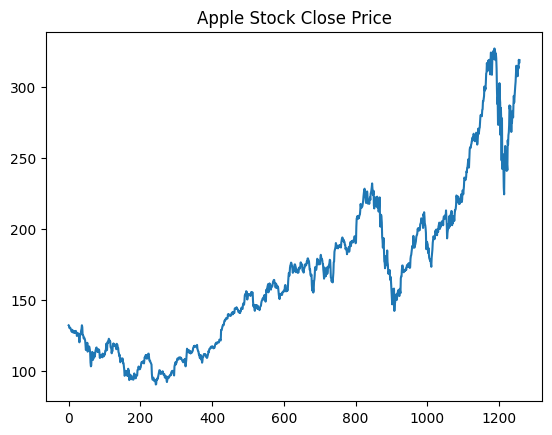

In [ ]:
# Load and preprocess data
df = pd.read_csv('/content/AAPL (1).csv')
data = df['close']  # Use 'close' for stability
plt.plot(data)
plt.title("Apple Stock Close Price")
plt.show()

In [ ]:
df.head()


,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [ ]:
# Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(np.array(data).reshape(-1, 1))

In [ ]:
# Train-test split
training_size = int(len(data_scaled) * 0.65)
train_data = data_scaled[0:training_size]
test_data = data_scaled[training_size:]

In [ ]:
# Dataset creation
def create_dataset(dataset, time_step=100):
    X, y = [], []
    for i in range(len(dataset) - time_step):
        X.append(dataset[i:i + time_step, 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [ ]:
# Reshape to [samples, time_steps, features]
X_train = X_train.reshape(X_train.shape[0], time_step, 1)
X_test = X_test.reshape(X_test.shape[0], time_step, 1)

In [ ]:
# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 293ms/step - loss: 0.0291 - val_loss: 0.0665
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 231ms/step - loss: 0.0060 - val_loss: 0.0043
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 323ms/step - loss: 0.0014 - val_loss: 0.0040
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 230ms/step - loss: 6.8841e-04 - val_loss: 0.0038
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 230ms/step - loss: 6.9189e-04 - val_loss: 0.0037
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 193ms/step - loss: 6.2846e-04 - val_loss: 0.0037
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 296ms/step - loss: 5.1883e-04 - val_loss: 0.0035
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 219ms/step - loss: 5.7689e-04 - val_loss: 0.0036
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 218ms/step - loss: 5.9809e-04 - val_loss: 0.0037
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 310ms/step - loss: 5.8056e-04 - val_loss: 0.0033
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 242ms/step - loss: 5.7299e-04 - val_loss: 0.0032
Epoch 12

In [ ]:
# Predictions on train and test
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 170ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


In [ ]:
# Inverse transform to get actual values
train_predict_actual = scaler.inverse_transform(train_predict)
test_predict_actual = scaler.inverse_transform(test_predict)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
# Evaluation metrics on test set
print("Test R² Score:", r2_score(y_test_actual, test_predict_actual))
print("Test MAE:", mean_absolute_error(y_test_actual, test_predict_actual))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_actual, test_predict_actual)))
print("Test MAPE:", np.mean(np.abs((y_test_actual - test_predict_actual) / y_test_actual)) * 100, "%")


Test R² Score: 0.9787176872461745
Test MAE: 5.4196443153895935
Test RMSE: 7.058917351861005
Test MAPE: 2.230764118376758 %


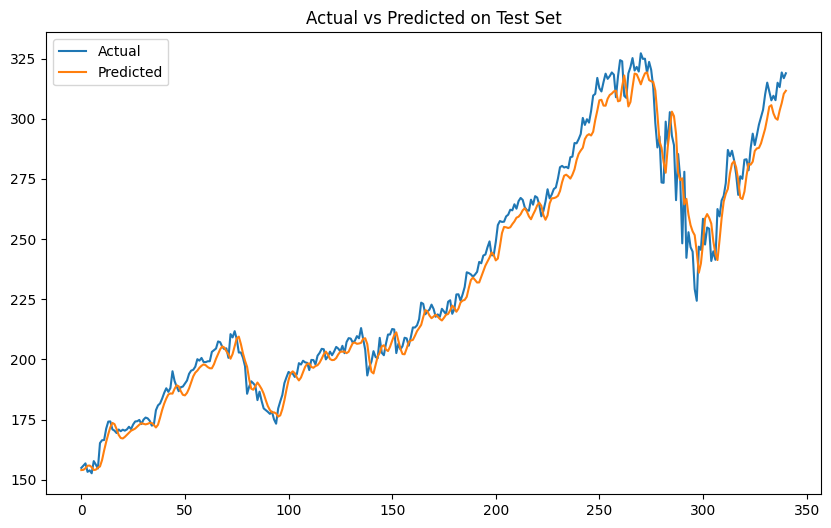

In [ ]:
# Plot real vs predicted
plt.figure(figsize=(10,6))
plt.plot(y_test_actual, label='Actual')
plt.plot(test_predict_actual, label='Predicted')
plt.legend()
plt.title("Actual vs Predicted on Test Set")
plt.show()

In [ ]:
# Forecast next 30 days
x_input = test_data[-time_step:].reshape(1, -1)
temp_input = x_input[0].tolist()
future_output = []

In [ ]:
for i in range(30):
    x_input = np.array(temp_input[-time_step:]).reshape((1, time_step, 1))
    yhat = model.predict(x_input, verbose=0)
    temp_input.append(yhat[0][0])
    future_output.append(yhat[0][0])

In [ ]:
# Inverse transform predictions
future_output = scaler.inverse_transform(np.array(future_output).reshape(-1, 1))


In [ ]:
# Plot future forecast
day_new = np.arange(1, 101)
day_future = np.arange(101, 131)

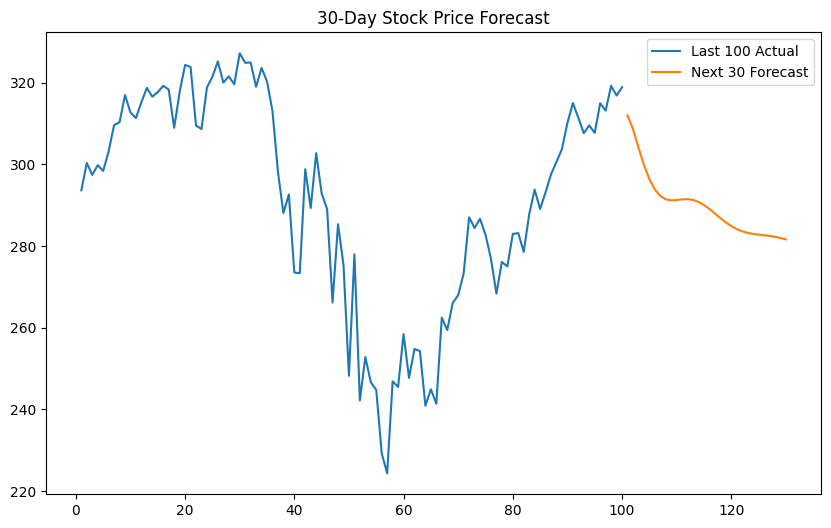

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(day_new, scaler.inverse_transform(test_data[-100:]), label="Last 100 Actual")
plt.plot(day_future, future_output, label="Next 30 Forecast")
plt.legend()
plt.title("30-Day Stock Price Forecast")
plt.show()

In [ ]:
input_seq = data_scaled[-100:]
temp_input = list(input_seq)
lst_output = []

last_100_points = data_scaled[-100:].flatten()

# Initialize arrays for predictions
forecast_values = []

# Current sequence is the last 100 points
current_seq = last_100_points.copy()

# Forecast next 30 days
for i in range(30):
    # Reshape for prediction (careful with dimensions)
    x_input = current_seq.reshape(1, len(current_seq), 1)

    # Predict next value
    pred = float(model.predict(x_input, verbose=0)[0][0])

    # Store the prediction
    forecast_values.append(pred)

    # Update sequence: remove oldest, add newest prediction
    current_seq = np.append(current_seq[1:], pred)

# Convert predictions back to original scale
predicted_future_prices = scaler.inverse_transform(np.array(forecast_values).reshape(-1, 1))




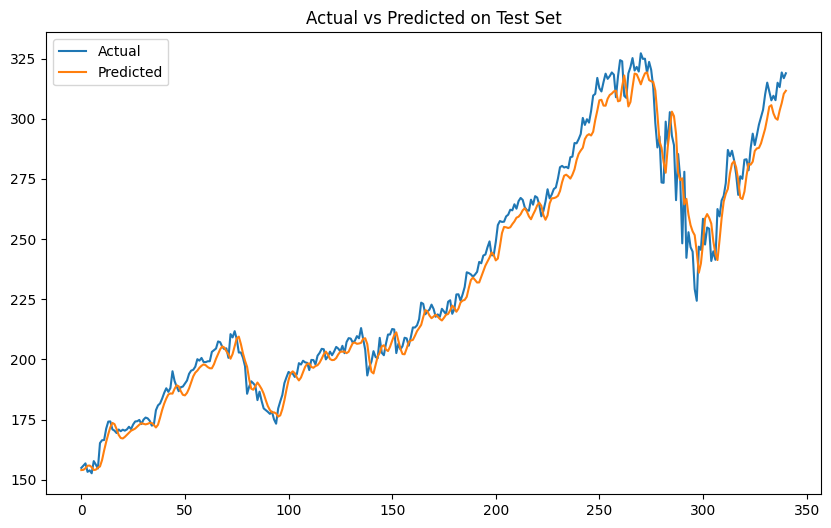

In [ ]:
# Plot real vs predicted
plt.figure(figsize=(10,6))
plt.plot(y_test_actual, label='Actual')
plt.plot(test_predict_actual, label='Predicted')
plt.legend()
plt.title("Actual vs Predicted on Test Set")
plt.show()


In [ ]:
# Forecast next 30 days
# Use the last 100 scaled values from your data to start prediction
input_seq = data_scaled[-100:].flatten()
temp_input = list(input_seq)
lst_output = []

In [ ]:
# Predict 30 future values
n_steps = 100
for i in range(30):
    # Reshape for model input
    x_input = np.array(temp_input[-n_steps:]).reshape(1, n_steps, 1)
    # Predict next value
    yhat = model.predict(x_input, verbose=0)
    # Extract prediction and convert to scalar
    next_pred = float(yhat[0][0])
    # Add to input sequence and output list
    temp_input.append(next_pred)
    lst_output.append(next_pred)

In [ ]:
# Prepare data for evaluation
# Convert to numpy array and reshape for inverse scaling
lst_output_array = np.array(lst_output).reshape(-1, 1)
# Get the original scale predictions
predicted_future_prices = scaler.inverse_transform(lst_output_array)


In [ ]:
# Get actual values for the last 30 days
df1 = data_scaled[-30:].reshape(-1, 1)  # Last 30 days of scaled data
actual_last_30_days = scaler.inverse_transform(df1)  # Convert back to original scale


In [ ]:

# Display both actual and predicted
print("Actual Values (Last 30 Days):")
print(actual_last_30_days.flatten())
print("\nPredicted Future Values (Next 30 Days):")
print(predicted_future_prices.flatten())

Actual Values (Last 30 Days):
[273.25 287.05 284.43 286.69 282.8  276.93 268.37 276.1  275.03 282.97
 283.17 278.58 287.73 293.8  289.07 293.16 297.56 300.63 303.74 310.13
 315.01 311.41 307.65 309.54 307.71 314.96 313.14 319.23 316.85 318.89]

Predicted Future Values (Next 30 Days):
[311.95939808 308.66930722 304.15798492 299.90856483 296.43278049
 293.88602826 292.26335273 291.4359558  291.18838332 291.26812153
 291.4325816  291.48576394 291.29892691 290.81750461 290.0545279
 289.07452998 287.97190348 286.84942714 285.79933356 284.88989718
 284.15891176 283.61285746 283.23157381 282.97591174 282.79693841
 282.64483155 282.47631963 282.25984901 281.97782872 281.62646102]


In [ ]:
# Evaluation metrics (comparing forecast with last 30 actual days)
mae = mean_absolute_error(actual_last_30_days, predicted_future_prices)
rmse = np.sqrt(mean_squared_error(actual_last_30_days, predicted_future_prices))
mape = np.mean(np.abs((actual_last_30_days - predicted_future_prices) / actual_last_30_days)) * 100


In [ ]:
# Plot future forecast with comparison to actual data
day_new = np.arange(1, 101)
day_future = np.arange(101, 131)

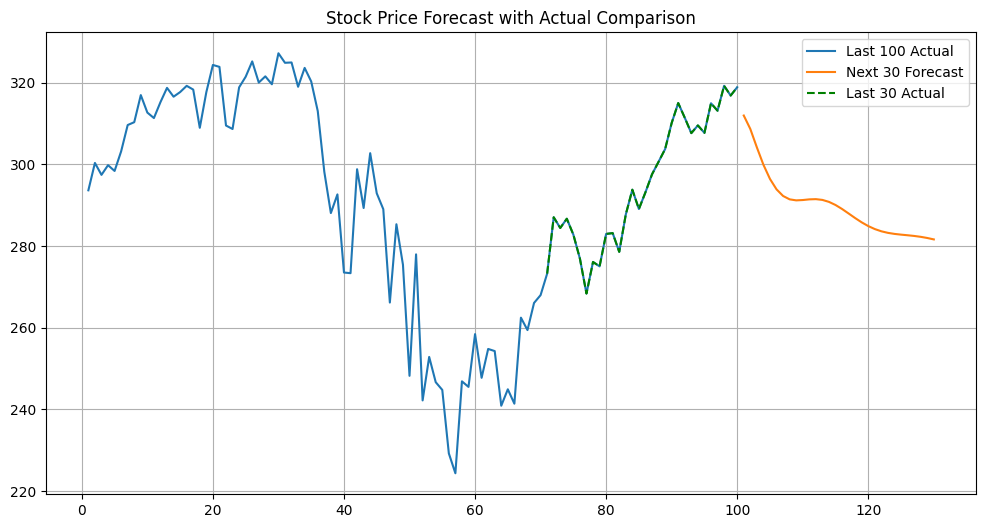

In [ ]:
plt.figure(figsize=(12,6))
# Last 100 actual days
plt.plot(day_new, scaler.inverse_transform(data_scaled[-100:]), label="Last 100 Actual")
# Next 30 forecast days
plt.plot(day_future, predicted_future_prices, label="Next 30 Forecast")
# Add a line for the last 30 actual days (for comparison)
plt.plot(day_new[-30:], actual_last_30_days, 'g--', label="Last 30 Actual")
plt.legend()
plt.title("Stock Price Forecast with Actual Comparison")
plt.grid(True)
plt.show()